# Il ruolo delle donne nel cinema: un viaggio nel tempo 

Il cinema è stato, fin dalla sua nascita, uno specchio della società, riflettendo (e talvolta influenzando) il ruolo della donna nella cultura di ogni epoca. In questo viaggio attraverso i dati, esploreremo come la presenza femminile si sia evoluta nel tempo, analizzando diversi aspetti come la loro rappresentazione nei generi cinematografici, il riconoscimento ottenuto attraverso premi e la percezione del pubblico e della critica.

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ottiene la directory di lavoro corrente
script_dir = os.getcwd()

# Cartella dove si trovano i file CSV (modifica con il percorso corretto)
clean_path = os.path.join(script_dir, "Data", "clean_data")

# Caricamento dei dataset con percorsi dinamici
actors = pd.read_csv(os.path.join(clean_path, "actors_cleaned.csv"))
countries = pd.read_csv(os.path.join(clean_path, "countries_cleaned.csv"))
crew = pd.read_csv(os.path.join(clean_path, "crew_cleaned.csv"))
genres = pd.read_csv(os.path.join(clean_path, "genres_cleaned.csv"))
languages = pd.read_csv(os.path.join(clean_path, "languages_cleaned.csv"))
movies = pd.read_csv(os.path.join(clean_path, "movies_cleaned.csv"))
posters = pd.read_csv(os.path.join(clean_path, "posters_cleaned.csv"))
releases = pd.read_csv(os.path.join(clean_path, "releases_cleaned.csv"))
studios = pd.read_csv(os.path.join(clean_path, "studios_cleaned.csv"))
themes = pd.read_csv(os.path.join(clean_path, "themes_cleaned.csv"))
oscar_awards = pd.read_csv(os.path.join(clean_path, "the_oscar_awards_cleaned.csv"))
rotten_tomatoes = pd.read_csv(os.path.join(clean_path, "rotten_tomatoes_reviews_cleaned.csv"))


### 1. La presenza delle donne nei film

All’inizio del XX secolo, i ruoli femminili erano spesso relegati a figure stereotipate: la damigella in pericolo, la moglie devota o la femme fatale. Ma nel tempo, questa rappresentazione è cambiata.

Grafico 1: Percentuale di ruoli femminili nei film dal 1920 a oggi.



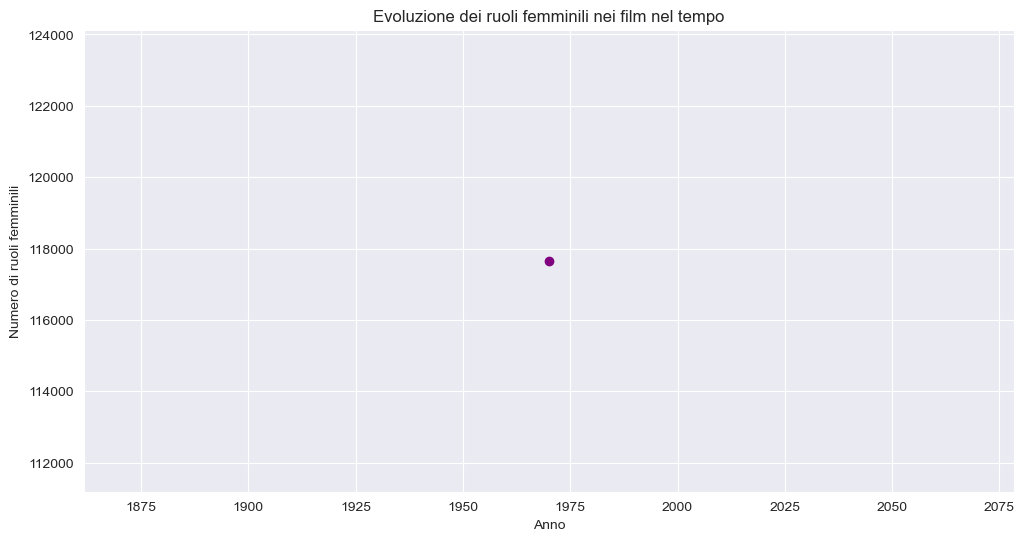

In [10]:
movies['year'] = movies['date'].dt.year  # Estrae solo l'anno

# Unione dei dati attori-film
actors_movies = actors.merge(movies[['id', 'year']], left_on='id', right_on='id')

# Filtriamo i ruoli femminili (puoi personalizzare questa lista)
female_roles_keywords = ["mother", "wife", "girl", "woman", "queen", "princess", "sister", "lady", "daughter"]
actors_movies['is_female_role'] = actors_movies['role'].str.contains('|'.join(female_roles_keywords), case=False, na=False)

#  Raggruppiamo per anno e contiamo i ruoli femminili
female_roles_by_year = actors_movies[actors_movies['is_female_role']].groupby('year').size()

# Creazione del grafico
plt.figure(figsize=(12, 6))
plt.plot(female_roles_by_year.index, female_roles_by_year.values, marker='o', linestyle='-', color='purple')
plt.xlabel("Anno")
plt.ylabel("Numero di ruoli femminili")
plt.title("Evoluzione dei ruoli femminili nei film nel tempo")
plt.grid(True)
plt.show()